In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Class_Abalone.csv')

In [2]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_Weight    4177 non-null   float64
 5   Shucked_Weight  4177 non-null   float64
 6   Viscera_Weight  4177 non-null   float64
 7   Shell_Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# # drop kolom yang tidak diperlukan
# data = df.drop(columns=['User ID'])

# # jalankan proses one-hot encoding dengan pd.get_dummies()
# data = pd.get_dummies(data)
# data

In [5]:
# pisahkan atribut dan label
predictions = ['Length' , 'Diameter' , 'Height' , 'Whole_Weight', 'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight','Rings']

X = df[predictions]
y = df['Sex'] 

In [6]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [7]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)
print(len(y_test))

836


In [8]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
#uji akurasi model
model.score(X_test, y_test)

0.569377990430622

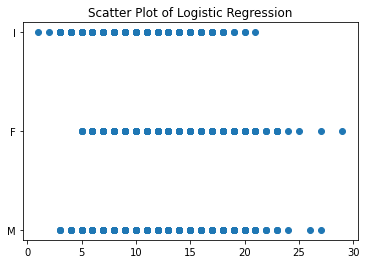

In [15]:
plt.scatter(X['Rings'], y)
plt.title('Scatter Plot of Logistic Regression')
plt.show()